In [77]:
import sys
import torch
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme(style="white")

# GDSC Insight

This script is intended to get an overview about the data sources provided by the GDSC database.

In [20]:
device = torch.device("cpu")

print(f"""
    Python version:   {sys.version}
    PyTorch version:  {torch.__version__}
    Device:           {device}
    CUDA available:   {torch.cuda.is_available()}
""")


    Python version:   3.10.4 | packaged by conda-forge | (main, Mar 24 2022, 17:45:10) [Clang 12.0.1 ]
    PyTorch version:  1.11.0
    Device:           cpu
    CUDA available:   False



In [17]:
!pwd
!ls -lh ../../datasets/gdsc/screening_data | grep '/\|[xlsx|csv]$' | sort

/Users/cwoest/Documents/Academics/Data_Science_UP/master_thesis/material/GNN-material
-rw-r--r--@ 1 cwoest  staff    11M Apr 27 11:28 GDSC2_fitted_dose_response_25Feb20.xlsx
-rw-r--r--@ 1 cwoest  staff    26M Apr 21 17:03 GDSC1_fitted_dose_response_25Feb20.xlsx
-rw-r--r--@ 1 cwoest  staff   115K Apr 27 11:29 Cell_Lines_Details.xlsx
-rw-r--r--@ 1 cwoest  staff   669M Apr 27 11:31 GDSC1_public_raw_data_25Feb20.csv
-rw-r--r--@ 1 cwoest  staff   826M Apr 27 11:32 GDSC2_public_raw_data_25Feb20.csv


Different __Screening Data__ from the [GDSC's download page](https://www.cancerrxgene.org/downloads/bulk_download) has been saved in the folder above. The description to each file compared to the website is as follows: 
- __Drug Screening - IC50s__
  - __GDSC1-dataset__: `GDSC1_fitted_dose_response_25Feb20.xlsx`
  - __GDSC2-dataset__: `GDSC2_fitted_dose_response_25Feb20.xlsx`
- __Drug Screening - Raw data__: 
  - __GDSC1-raw-data__: `GDSC1_public_raw_data_25Feb20.csv`
  - __GDSC2-raw-data__: `GDSC2_public_raw_data_25Feb20.csv`
- __All cell lines screened__: `Cell_Lines_Details.xlsx`

In the following we will investigate each of these data sources.

## Drug Screening

In [47]:
PATH_TO_GDSC_SCREENING_DATA = '../../datasets/gdsc/screening_data/'

### IC50s

In [12]:
GDSC1_IC50_FILE = 'GDSC1_fitted_dose_response_25Feb20.xlsx'
GDSC2_IC50_FILE = 'GDSC2_fitted_dose_response_25Feb20.xlsx'

In [20]:
# Read the IC50 files.

# GDSC1
start = time.time()
gdsc1_ic50s = pd.read_excel(f'{PATH_TO_GDSC_SCREENING_DATA}{GDSC1_IC50_FILE}', header=0)
print(f"File `{GDSC1_IC50_FILE}` took {time.time()-start:.5f} seconds to import. It has shape {gdsc1_ic50s.shape}")

# GDSC2
start = time.time()
gdsc2_ic50s = pd.read_excel(f'{PATH_TO_GDSC_SCREENING_DATA}{GDSC2_IC50_FILE}', header=0)
print(f"File `{GDSC2_IC50_FILE}` took {time.time()-start:.5f} seconds to import. It has shape {gdsc2_ic50s.shape}")

File `GDSC1_fitted_dose_response_25Feb20.xlsx` took 57.11425 seconds to import. It has shape (310904, 19)
File `GDSC2_fitted_dose_response_25Feb20.xlsx` took 24.19299 seconds to import. It has shape (135242, 19)


In [17]:
gdsc1_ic50s.head(5)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,281,12974350,683665,MC-CAR,SIDM00636,MM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.395685,0.982114,0.022521,-0.189576
1,GDSC1,281,12975300,684055,ES3,SIDM00265,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.140923,0.984816,0.031840,0.508635
2,GDSC1,281,12975647,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.968757,0.985693,0.026052,1.284229
3,GDSC1,281,12975980,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692768,0.972699,0.110056,0.088760
4,GDSC1,281,12976330,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.478678,0.944462,0.087011,-0.111820


In [18]:
gdsc2_ic50s.head(5)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,282,13320532,749709,HCC1954,SIDM00872,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,-0.251083,0.975203,0.112373,0.906631
1,GDSC2,282,13320565,749710,HCC1143,SIDM00866,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,1.343315,0.978464,0.067577,1.683567
2,GDSC2,282,13320598,749711,HCC1187,SIDM00885,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,1.736985,0.995100,0.045205,1.875399
3,GDSC2,282,13320631,749712,HCC1395,SIDM00884,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,-2.309078,0.867832,0.107282,-0.096212
4,GDSC2,282,13320668,749713,HCC1599,SIDM00877,BRCA,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000098,0.1,-3.106684,0.777532,0.098286,-0.484878


- GDSC1 contains $310,904$ rows
- GDSC2 contains $135,242$ rows

Each dataset contains the same $19$ columns. They hold the following informations:
<details>
  <summary>Click to see column descriptions:</summary>

| Column | Description |
| ------ | ----------- | 
| `DATASET` |  Name of the dataset. |
| `NLME_RESULT_ID` |  |
| `NLME_CURVE_ID` |  |
| `COSMIC_ID` | Cell identifier from the COSMIC database. |
| `CELL_LINE_NAME` | Primary name for the cell line. |
| `SANGER_MODEL_ID` |  |
| `TCGA_DESC` |  |
| `DRUG_ID` | Unique identifier for a drug. Used for internal lab tracking. |
| `DRUG_NAME` | Primary name for the drug. |
| `PUTATIVE_TARGET` | Putative drug target. |
| `PATHWAY_NAME` |  |
| `COMPANY_ID` |  |
| `WEBRELEASE` |  |
| `MIN_CONC` | Minimum screening concentration of the drug. |
| `MAX_CONC` | Maximum screening concentration of the drug. |
| `LN_IC50` | Natural log of the fitted IC50. To convert to micromolar take the exponent of this value, i.e. $\exp(\text{IC50\_nat\_log})$. |
| `AUC` | Area Under the Curve for the fitted model. Presented as a fraction of the total area between the highest and lowest screening concentration. |
| `RMSE` | Root Mean Squared Error, a measurement of how well the modelled curve fits the data points. |
| `Z_SCORE` | Z score of the LN_IC50 ($x$) comparing it to the mean ($\mu$) and standard deviation ($\sigma^2$) of the LN_IC50 values for the drug in question over all cell lines treated. $Z = \frac{x-\mu}{\sigma^2}$ |

</details>

The tables contain the IC50 values (`LN_IC50`) for specific drugs (`DRUG_NAME`) on cancer cell lines (`CELL_LINE_NAME`). Thus, they hold information about how specific drugs influence the killing of cancer cells.

#### EDA

__Questions to answer__: 

- [x] How many unique drugs, cell-lines and cell-line-drug combinations are there (per database)? 
- [x] How many number of observations does each drug (`DRUG_NAME`) have (per database)? 
- [ ] How many number of observations does each cell line (`CELL_LINE_NAME`) have (per database)?
- [ ] How are the IC50 values distributed (per database)?

In [205]:
columns = ['DRUG_NAME', 'CELL_LINE_NAME', ['DRUG_NAME', 'CELL_LINE_NAME']]

for col in columns:
  gdsc1_uniq, gdsc2_uniq = np.unique(gdsc1_ic50s[col]), np.unique(gdsc2_ic50s[col])

  print(f"""
      Number of unique {col}'s 
          - for GDSC1 is {gdsc1_uniq.size}
          - for GDSC2 is {gdsc2_uniq.size}
          - in total for both is {set(gdsc1_uniq.tolist() + gdsc2_uniq.tolist()).__len__()}
            Thus, {(gdsc1_uniq.size+gdsc2_uniq.size) - set(gdsc1_uniq.tolist() + gdsc2_uniq.tolist()).__len__()} {col}'s are contained in both databases (since the full join is {(gdsc1_uniq.size+gdsc2_uniq.size)}).
  """)


      Number of unique DRUG_NAME's 
          - for GDSC1 is 345
          - for GDSC2 is 192
          - in total for both is 449
            Thus, 88 DRUG_NAME's are contained in both databases (since the full join is 537).
  

      Number of unique CELL_LINE_NAME's 
          - for GDSC1 is 987
          - for GDSC2 is 809
          - in total for both is 988
            Thus, 808 CELL_LINE_NAME's are contained in both databases (since the full join is 1796).
  

      Number of unique ['DRUG_NAME', 'CELL_LINE_NAME']'s 
          - for GDSC1 is 1331
          - for GDSC2 is 1001
          - in total for both is 1436
            Thus, 896 ['DRUG_NAME', 'CELL_LINE_NAME']'s are contained in both databases (since the full join is 2332).
  


In [293]:
# Join both datasets for analysis purposes.
gdsc_join = pd.concat([gdsc1_ic50s, gdsc2_ic50s], ignore_index=True)
assert gdsc_join[gdsc_join.index.duplicated()].shape[0] == 0
assert gdsc_join.shape[0] == gdsc1_ic50s.shape[0] + gdsc2_ic50s.shape[0]

1. We start by investigating the `DRUG_NAME` column.

In [294]:
col = 'DRUG_NAME'

In [295]:
# How many number of observations does each drug have per database? 
gdsc_value_counts = gdsc_join[['DATASET', col]].value_counts().to_frame().reset_index()
gdsc_value_counts.rename(columns={0:'counts'}, inplace=True)
gdsc_value_counts.head(-5)

,DATASET,DRUG_NAME,counts
0,GDSC1,Cisplatin,1879
1,GDSC1,AZD7762,1878
2,GDSC1,SN-38,1876
3,GDSC1,PLX-4720,1869
4,GDSC1,Avagacestat,1861
...,...,...,...
527,GDSC2,PF-4708671,49
528,GDSC2,NU7441,48
529,GDSC2,AZD6482,48
530,GDSC2,JQ1,48


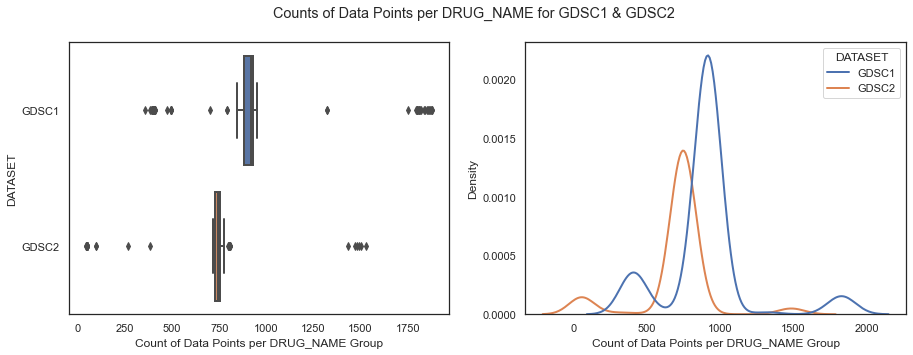

In [296]:
# Distribution of counts per DRUG_NAME.

figure, axs = plt.subplots(1, 2, figsize=(15, 5))
figure.suptitle(f"Counts of Data Points per {col} for GDSC1 & GDSC2")

sns.boxplot(data=gdsc_value_counts, x='counts', y='DATASET', linewidth=2, ax=axs[0]);
axs[0].set_xlabel(f"Count of Data Points per {col} Group");
sns.kdeplot(data=gdsc_value_counts, x='counts', hue='DATASET', linewidth=2, ax=axs[1]);
axs[1].set_xlabel(f"Count of Data Points per {col} Group");

- The counts per cell-line (`DRUG_NAME`) are not different strongly between the two databases.
- Outliers are going in both directions, smaller as well as larger counts. This means, that there are some drugs for which their number of observations is relatively low and some where its relatively high.

In [297]:
describes = []
for db in ['GDSC1', 'GDSC2']:
    print(f"\nDatabase `{db}`\n{15*'-'}")
    describe = gdsc_value_counts[gdsc_value_counts.DATASET==db].counts.describe()
    describes.append(describe)
    print(describe)


Database `GDSC1`
---------------
count     345.000000
mean      901.171014
std       289.660963
min       358.000000
25%       881.000000
50%       917.000000
75%       929.000000
max      1879.000000
Name: counts, dtype: float64

Database `GDSC2`
---------------
count     192.000000
mean      704.385417
std       245.918063
min        44.000000
25%       728.000000
50%       745.000000
75%       752.750000
max      1530.000000
Name: counts, dtype: float64


In [298]:
print(f"The drugs (`{col}`) for")
for i, db in enumerate(['GDSC1', 'GDSC2']):
    print(f""" 
        - {db} have
            - mostly (IQR) between {round(describes[i]['25%'])} and {round(describes[i]['75%'])} observations
            - on average {round(describes[i]['mean'])} observations per drug. This corresponds to {100*round(describes[i]['mean'])/gdsc_join[gdsc_join.DATASET==db].shape[0]:2.2f}% out of all observations ({gdsc_join[gdsc_join.DATASET==db].shape[0]}) in {db}.
    """)

The drugs (`DRUG_NAME`) for
 
        - GDSC1 have
            - mostly (IQR) between 881 and 929 observations
            - on average 901 observations per drug. This corresponds to 0.29% out of all observations (310904) in GDSC1.
    
 
        - GDSC2 have
            - mostly (IQR) between 728 and 753 observations
            - on average 704 observations per drug. This corresponds to 0.52% out of all observations (135242) in GDSC2.
    


2. Now we investigate analogous the `CELL_LINE_NAME` column.

In [299]:
col = 'CELL_LINE_NAME'

In [300]:
# How many number of observations does each drug have per database? 
gdsc_cell_line_value_counts = gdsc_join[['DATASET', col]].value_counts().to_frame().reset_index()
gdsc_cell_line_value_counts.rename(columns={0:'counts'}, inplace=True)
gdsc_cell_line_value_counts.head(-5)

,DATASET,CELL_LINE_NAME,counts
0,GDSC1,LS-123,367
1,GDSC1,TE-12,367
2,GDSC1,NCI-H1304,367
3,GDSC1,MZ1-PC,367
4,GDSC1,KCL-22,367
...,...,...,...
1786,GDSC1,NCI-H128,41
1787,GDSC1,ECC12,32
1788,GDSC2,NCI-H508,27
1789,GDSC1,KP-N-RT-BM-1,25


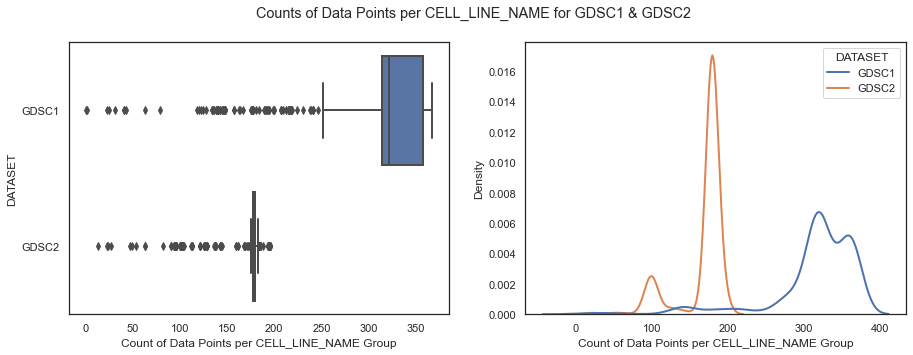

In [301]:
# Distribution of counts per CELL_LINE_NAME.

figure, axs = plt.subplots(1, 2, figsize=(15, 5))
figure.suptitle(f"Counts of Data Points per {col} for GDSC1 & GDSC2")

sns.boxplot(data=gdsc_cell_line_value_counts, x='counts', y='DATASET', linewidth=2, ax=axs[0]);
axs[0].set_xlabel(f"Count of Data Points per {col} Group");
sns.kdeplot(data=gdsc_cell_line_value_counts, x='counts', hue='DATASET', linewidth=2, ax=axs[1]);
axs[1].set_xlabel(f"Count of Data Points per {col} Group");

- The counts per cell-line (`CELL_LINE_NAME`) different strongly between the two databases.
- Outliers are mostly in the directions of smaller counts. This means, that it is more unlikely that cell-lines have relatively low counts.

In [302]:
describes = []
for db in ['GDSC1', 'GDSC2']:
    print(f"\nDatabase `{db}`\n{15*'-'}")
    describe = gdsc_cell_line_value_counts[gdsc_cell_line_value_counts.DATASET==db].counts.describe()
    describes.append(describe)
    print(describe)


Database `GDSC1`
---------------
count    987.000000
mean     314.998987
std       57.980194
min        1.000000
25%      314.000000
50%      322.000000
75%      358.000000
max      367.000000
Name: counts, dtype: float64

Database `GDSC2`
---------------
count    809.000000
mean     167.171817
std       31.114829
min       14.000000
25%      178.000000
50%      179.000000
75%      180.000000
max      196.000000
Name: counts, dtype: float64


In [303]:
print(f"The cell-lines (`{col}`) for")
for i, db in enumerate(['GDSC1', 'GDSC2']):
    print(f""" 
        - {db} have
            - mostly (IQR) between {round(describes[i]['25%'])} and {round(describes[i]['75%'])} observations
            - on average {round(describes[i]['mean'])} observations per cell-line. This corresponds to {100*round(describes[i]['mean'])/gdsc_join[gdsc_join.DATASET==db].shape[0]:2.2f}% out of all observations ({gdsc_join[gdsc_join.DATASET==db].shape[0]}) in {db}.
    """)

The cell-lines (`CELL_LINE_NAME`) for
 
        - GDSC1 have
            - mostly (IQR) between 314 and 358 observations
            - on average 315 observations per cell-line. This corresponds to 0.10% out of all observations (310904) in GDSC1.
    
 
        - GDSC2 have
            - mostly (IQR) between 178 and 180 observations
            - on average 167 observations per cell-line. This corresponds to 0.12% out of all observations (135242) in GDSC2.
    


3. Investigation of the distribution of IC50 values.

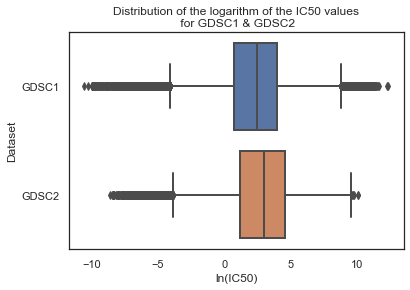

In [304]:
# Compare general IC50 distribution for both GDSC datasets.
sns.boxplot(data=gdsc_join, y='DATASET', x='LN_IC50', linewidth=2);
plt.xlabel("ln(IC50)");
plt.ylabel("Dataset");
plt.title("Distribution of the logarithm of the IC50 values\n for GDSC1 & GDSC2");

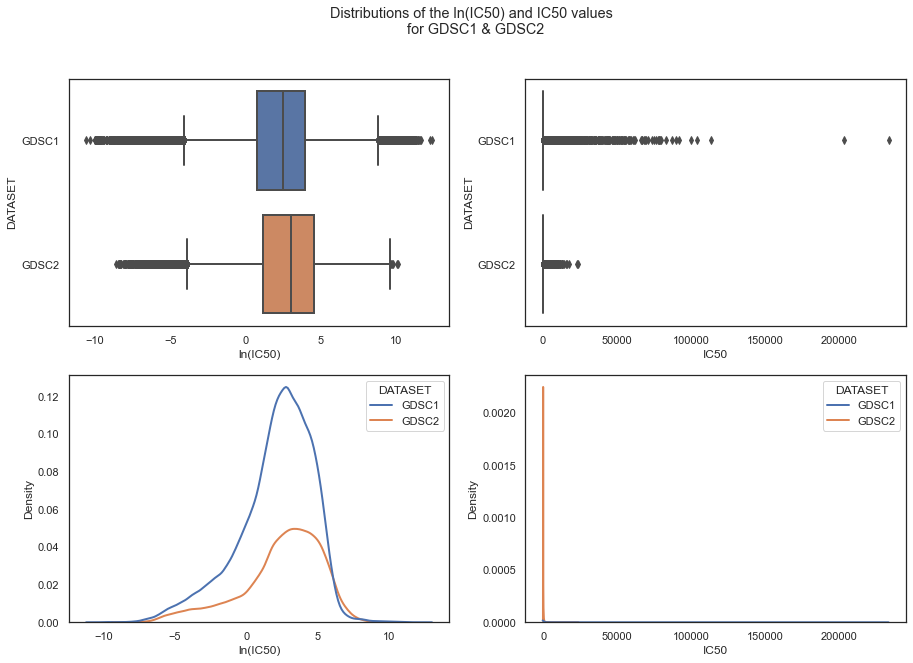

In [305]:
# Distribution of the IC50 values.

figure, axs = plt.subplots(2, 2, figsize=(15, 10))
figure.suptitle(f"Distributions of the ln(IC50) and IC50 values \n for GDSC1 & GDSC2")

sns.boxplot(data=gdsc_join, y='DATASET', x='LN_IC50', linewidth=2, ax=axs[0, 0]);
axs[0, 0].set_xlabel(f"ln(IC50)");
sns.boxplot(y=gdsc_join.DATASET, x=np.exp(gdsc_join.LN_IC50), linewidth=2, ax=axs[0, 1]);
axs[0, 1].set_xlabel(f"IC50");
sns.kdeplot(data=gdsc_join, hue='DATASET', x='LN_IC50', linewidth=2, ax=axs[1, 0]);
axs[1, 0].set_xlabel(f"ln(IC50)");
sns.kdeplot(hue=gdsc_join.DATASET, x=np.exp(gdsc_join.LN_IC50), linewidth=2, ax=axs[1, 1]);
axs[1, 1].set_xlabel(f"IC50");

- The distribution of the $ln(IC50)$ values is very similar between the two databases GDSC1 and GDSC2.

## Raw Data

In [48]:
GDSC1_RAW_FILE = 'GDSC1_public_raw_data_25Feb20.csv.xlsx'
GDSC2_RAW_FILE = 'GDSC2_public_raw_data_25Feb20.csv.xlsx'